In [74]:
# from google.colab import files
# files.upload()  # Selecciona tu archivo kaggle.json cuando se abra el diálogo

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 26.3MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [4]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print(df.dtypes)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


- Las primeras 5 columnas son categóricas (object).
- Las últimas 3 son numéricas (int64).

In [6]:
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


no hay valores nulos.

In [7]:
print(df.describe())


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


**Variables numéricas (`describe()`)**

1. **math score**

   * Media: 66, rango: 0 a 100.
   * Alta dispersión (std = 15.16).
   * Hay al menos un caso con puntaje 0 → posible caso atípico o fracaso total.

2. **reading score**

   * Media más alta que en matemáticas (69.17).
   * El mínimo es 17 → no hay ceros.
   * Menor dispersión que matemáticas.

3. **writing score**

   * Media intermedia (68.05).
   * El mínimo es 10.
   * Desviación similar a las otras dos → comportamiento parejo.


*Todos los puntajes están en la misma escala (0–100), lo que facilita comparaciones.*

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())



Columna: gender
gender
female    518
male      482
Name: count, dtype: int64

Columna: race/ethnicity
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Columna: parental level of education
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Columna: lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Columna: test preparation course
test preparation course
none         642
completed    358
Name: count, dtype: int64


**Variables categóricas (`value_counts()`)**

1. **gender**

   * Ligeramente más mujeres (518) que hombres (482).
   * Equilibrado → se puede comparar por género sin problema.

2. **race/ethnicity**

   * Grupo C es el más numeroso, seguido de D y B.
   * Grupo A es el menos representado (sólo 89).
   * Puede influir en análisis socioculturales o de rendimiento.

3. **parental level of education**

   * Distribución variada.
   * "Some college" y "Associate's degree" son las más frecuentes.
   * "Master’s degree" es minoritaria → útil para contrastes.

4. **lunch**

   * Mayoría tiene almuerzo "standard" (645 vs 355).
   * Variable interesante para análisis socioeconómico (el tipo “free/reduced” suele asociarse a bajos recursos).

5. **test preparation course**

   * Mayoría **no** completó el curso (642 vs 358).
   * Puede ser clave para explicar diferencias de rendimiento.

---

## Visualizacion de los datos a trabajar

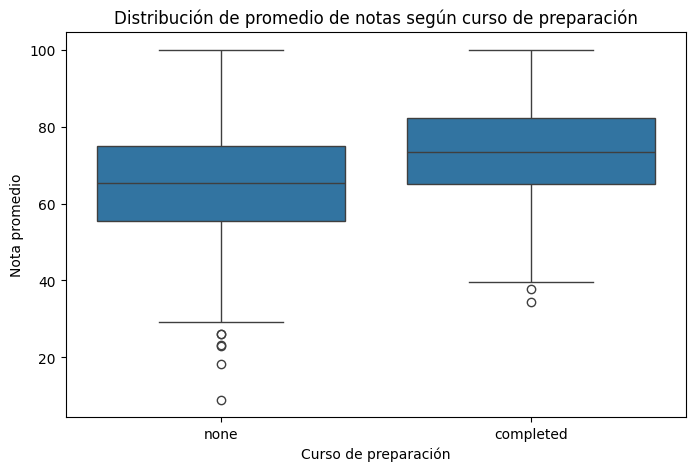

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna de promedio si no existe
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Distribución de promedio de notas según curso de preparación')
plt.xlabel('Curso de preparación')
plt.ylabel('Nota promedio')
plt.show()


> Como se puede ver, los que completaron el curso obtuvieron en promedio mejores notas.

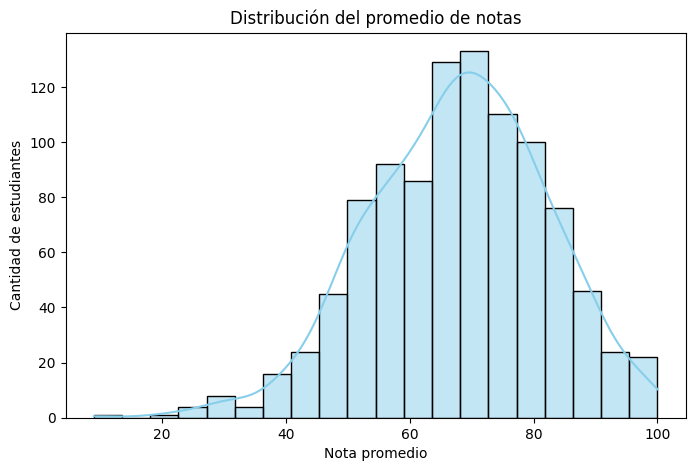

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del promedio de notas')
plt.xlabel('Nota promedio')
plt.ylabel('Cantidad de estudiantes')
plt.show()


> La distribución del promedio de notas presenta una forma aproximadamente normal, con la mayoría de los estudiantes concentrados entre 60 y 80 puntos. El valor más frecuente ronda los 70 puntos, lo que indica un rendimiento general moderado a alto. Hay pocos estudiantes con promedios extremadamente bajos o altos, lo que sugiere que los casos atípicos son escasos.

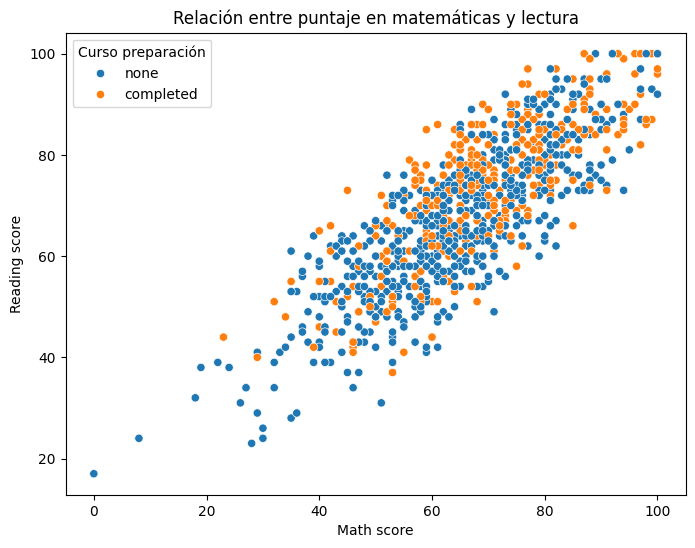

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', hue='test preparation course', data=df)
plt.title('Relación entre puntaje en matemáticas y lectura')
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.legend(title='Curso preparación')
plt.show()


> Esta relacion nos muestra que los estudiantes que completaron el curso obruvieron mejores notas en matematicas y lectura.

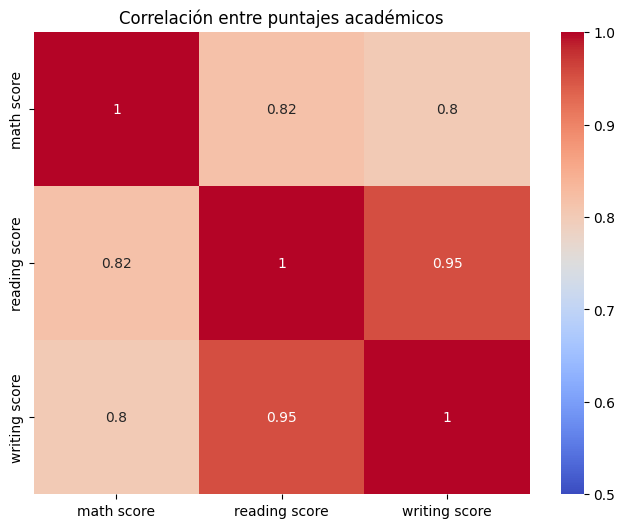

In [12]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm', vmin=0.5)
plt.title('Correlación entre puntajes académicos')
plt.show()


## Modelos Supervisados:

In [13]:
# Calcular promedio de notas
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

# Crear variable objetivo binaria (umbral: 60)
df["approved"] = df["average_score"] >= 60

# Verificar distribución de clases
df["approved"].value_counts()


,count
approved,
True,715
False,285


In [14]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df.drop(columns=["approved"])
y = df["approved"]

# División con 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar tamaños
print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)


Tamaño conjunto de entrenamiento: (700, 9)
Tamaño conjunto de prueba: (300, 9)


In [15]:
# Aplicar get_dummies a todas las columnas categóricas
X = pd.get_dummies(df.drop(columns=["approved"]), drop_first=True)
y = df["approved"]

# División con test_size = 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (700, 16)
X_test shape : (300, 16)


In [16]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)


# Vecinos más cercanos (KNeighborsClassifier)


In [17]:
# crear variable booleana que indica si un estudiante aprobó,
# usando el promedio de sus tres notas
df['final_grade'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['approved'] = df['final_grade'] >= 10
df['approved'].value_counts()

,count
approved,
True,999
False,1


In [18]:
# preparación de variable x e y
# conversión de las variables categóricas en variables numéricas
X = pd.get_dummies(df.drop(columns=['final_grade', 'approved']), drop_first=True)
y = df['approved']

In [19]:
# division del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# clasificador: K-Nearest Neighbors (KNN)
# busca los vecinos más cercanos (5) a un nuevo estudiante y
# decide su clase (aprobado true o false) según la mayoría
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.995
Precisión: 0.995
Recall: 1.0
F1 Score: 0.9974937343358395


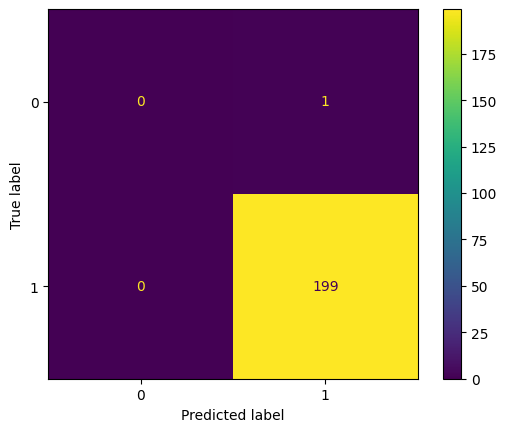

In [21]:
# evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precisión:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

- Accuracy (Exactitud): qué tan seguido acierta el modelo.

- Precisión: de todos los que predijo como “aprueba”, ¿cuántos aprobaron realmente?

- Recall (Sensibilidad): de todos los que aprobaron, ¿cuántos fueron detectados?

- F1-Score: equilibrio entre precisión y recall.


# Árbol de decisión (DecisionTreeClassifier)

In [22]:
from sklearn.tree import DecisionTreeClassifier

#entrenamiento del modelo
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

In [23]:
print('Accuracy:', accuracy_score(y_test, y_pred_arbol))
print('Precisión:', precision_score(y_test, y_pred_arbol))
print('Recall:', recall_score(y_test, y_pred_arbol))
print('F1 Score:', f1_score(y_test, y_pred_arbol))

Accuracy: 0.995
Precisión: 0.995
Recall: 1.0
F1 Score: 0.9974937343358395


Qué tan bien clasificó el árbol si un estudiante aprueba o no:

- Accuracy: aciertos totales / total de casos.

- Precisión: cuántos de los que predijo como "aprueba" realmente aprobaron.

- Recall: cuántos de los que sí aprobaron fueron detectados por el modelo.

- F1 Score: equilibrio entre precisión y recall.

In [24]:
# qué variables usó más el árbol para tomar decisiones.
import pandas as pd
import matplotlib.pyplot as plt

# importancia de cada variable
importancias = pd.Series(arbol.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(10)


## Modelos No Supervisados

**Variables seleccionadas reales:**

- math score

- reading score

- writing score

- test preparation course (0/1)

- lunch (0/1) indicador socioeconómico

- parental level of education (codificada como ordinal)

- gender y race/ethnicity (convertidas con one-hot encoding)

In [25]:
# Asegurar transformación de variables categóricas a numéricas

# 1. Codificar binarios
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})

# 2. Codificar ordinal
edu_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental level of education'] = df['parental level of education'].map(edu_order)

# 3. One-hot encoding
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity'], drop_first=True)


In [26]:
from sklearn.preprocessing import StandardScaler

# Variables para clustering
features = [
    'math score', 'reading score', 'writing score',
    'test preparation course', 'lunch', 'parental level of education',
] + [col for col in df.columns if col.startswith('gender_') or col.startswith('race/ethnicity_')]

X = df[features]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Variables para clustering
features = [
    'math score', 'reading score', 'writing score'
]

X2 = df[features]

# Escalado
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [28]:
from sklearn.decomposition import PCA

# PCA a 2 dimensiones para visualizar
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)


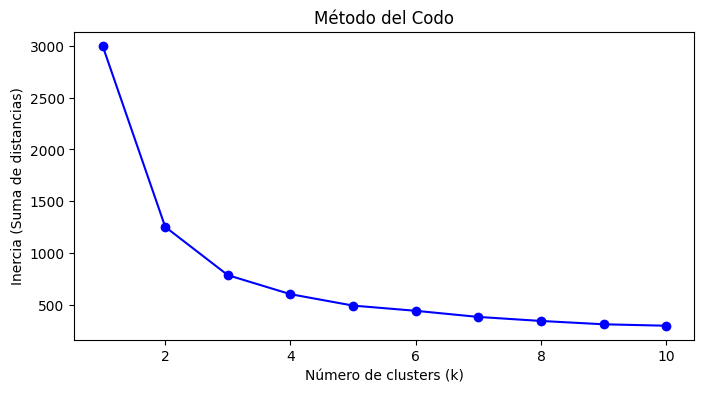

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias)')
plt.title('Método del Codo')
plt.show()

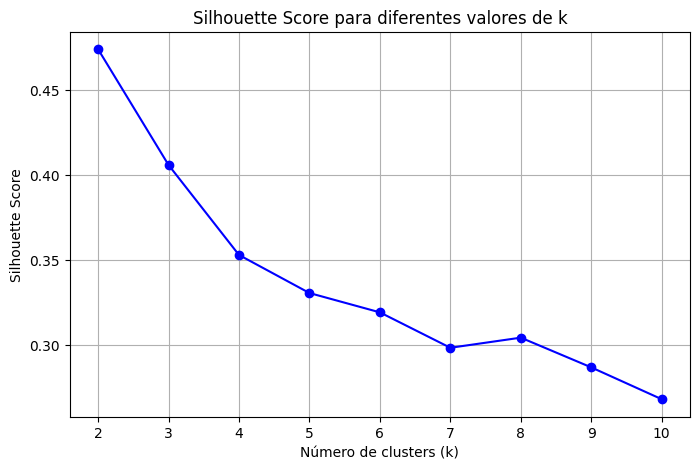

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Empezamos desde 2 porque silhouette no está definido para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2_scaled)
    score = silhouette_score(X2_scaled, labels)
    silhouette_scores.append(score)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [33]:
from sklearn.decomposition import PCA

# PCA a 2 dimensiones para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


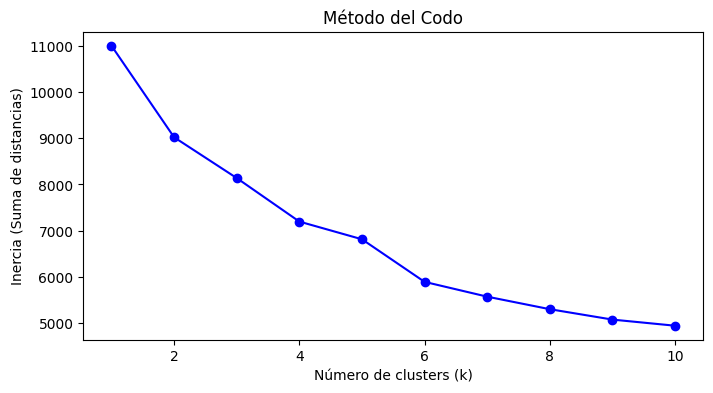

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias)')
plt.title('Método del Codo')
plt.show()


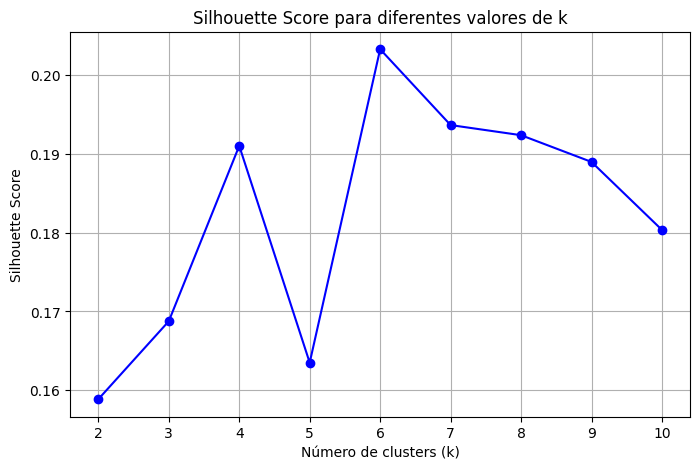

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 11)  # Empezamos desde 2 porque silhouette no está definido para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Modelo K_Means

se realizara de 2 formas

A partir de los resultados de Elbow(Codo) y Silhouette se llego a la desicion de utilizar k=6, es decir, 6 Clusters

In [36]:
X2.head(2)


,math score,reading score,writing score
0,72,72,74
1,69,90,88


In [37]:
X2_scaled

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

In [38]:
# Entrenar KMeans con k=6
kmeans_3 = KMeans(n_clusters=4, random_state=42)
clusters_3 = kmeans_3.fit_predict(X2_scaled)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters_3


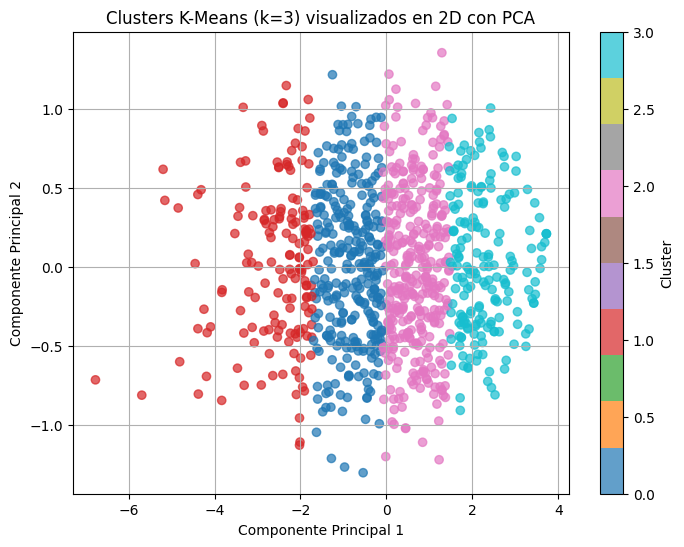

In [39]:
# Visualización en el espacio reducido por PCA
plt.figure(figsize=(8, 6))
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=clusters_3, cmap='tab10', alpha=0.7)
plt.title('Clusters K-Means (k=3) visualizados en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


#### Primera forma

In [40]:
# Entrenar KMeans con k=6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
clusters_6 = kmeans_6.fit_predict(X_scaled)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters_6


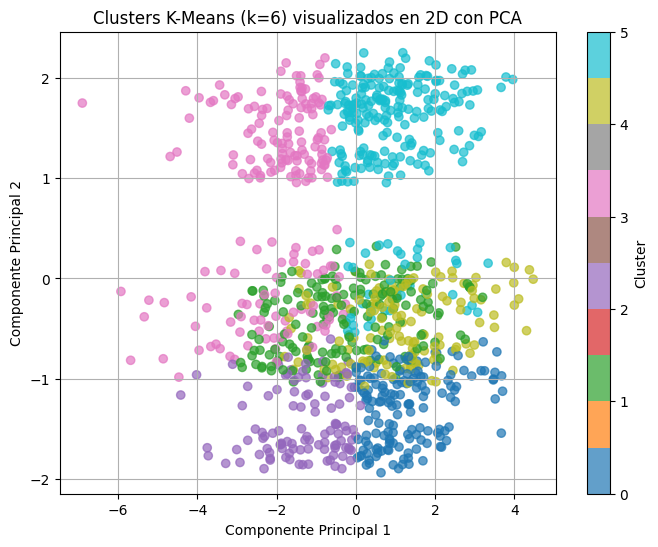

In [41]:
# Visualización en el espacio reducido por PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_6, cmap='tab10', alpha=0.7)
plt.title('Clusters K-Means (k=6) visualizados en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [42]:
# Agrupación por cluster para ver promedios por grupo
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)


,math score,reading score,writing score
cluster,,,
0,75.207792,78.831169,79.402597
1,65.595506,69.370787,67.837079
2,56.175926,57.481481,56.944444
3,50.331606,53.590674,50.803109
4,75.848485,74.954545,73.401515
5,72.502128,77.600000,77.051064


Conclusión del clustering con k = 6

1. **Cluster 0**

   * Puntajes altos en matemáticas (\~75), lectura (\~79) y escritura (\~79), con una proporción media de estudiantes que completaron el curso de preparación (\~40 %) y la mayoría con almuerzo estándar (\~78 %).
   * Nivel educativo parental intermedio-alto (\~2.35).
   * Predominan estudiantes de la categoría étnica D (100 %).
     ➤ Perfil: buen desempeño académico, perfil socioeconómico medio-alto y étnicamente homogéneo.

2. **Cluster 1**

   * Rendimiento moderado: matemáticas (\~66), lectura (\~69), escritura (\~68).
   * \~38 % completaron el curso, \~67 % con almuerzo estándar.
   * Nivel educativo parental \~1.92.
   * 100 % son hombres.
     ➤ Perfil: rendimiento intermedio, predominio de estudiantes masculinos.

3. **Cluster 2**

   * Puntajes bajos-moderados: matemáticas (\~56), lectura (\~57), escritura (\~57).
   * Solo \~19 % completaron el curso y \~43 % tienen almuerzo estándar.
   * Nivel educativo parental bajo (\~1.79).
     ➤ Perfil: grupo más vulnerable, menor rendimiento académico, baja preparación en el curso y perfil parental bajo.

4. **Cluster 3**

   * Rendimiento bajo: matemáticas (\~50), lectura (\~54), escritura (\~51).
   * \~19 % completaron el curso, \~40 % almuerzo estándar.
   * Nivel educativo parental más bajo (\~1.69).
   * Alta representación de la categoría C étnica (\~62 %).
     ➤ Perfil: formación académica más débil y predominancia de un grupo étnico específico.

5. **Cluster 4**

   * Excelente desempeño académico: matemáticas (\~76), lectura (\~75), escritura (\~73).
   * \~45 % completaron el curso, \~73 % almuerzo estándar.
   * Nivel parental intermedio-alto (\~2.33).
   * Todos pertenecen a la categoría étnica E (100 %).
     ➤ Perfil: alumnos sobresalientes, etnicidad homogénea (E), buen nivel socioeconómico.

6. **Cluster 5**

   * Muy buen rendimiento: matemáticas (\~72.5), lectura (\~77.6), escritura (\~77).
   * \~48 % completaron el curso, \~79 % almuerzo estándar.
   * Nivel parental \~2.34.
   * Alto porcentaje de estudiantes del grupo étnico C (\~85 %).
     ➤ Perfil: rendimiento académico destacado, fuerte presencia de la etnia C, nivel socioeconómico favorable.

---

**Resumen**

* Grupos **0, 4 y 5** están entre los de **mejor rendimiento**, con altos puntajes académicos y buen respaldo familiar/socioeconómico, diferenciándose principalmente por su composición étnica.
* **Clusters 2 y 3** contienen a los estudiantes con **peor desempeño**, mostrando menores niveles parental y de preparación formal.
* **Cluster 1**, aunque intermedio, está marcado por una identidad de género claramente masculina y una preparación académica moderada.

---

#### Segunda Forma

In [43]:
from sklearn.cluster import KMeans

# Aplicar KMeans con k=6
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Agregar etiquetas de cluster al DataFrame original
df['cluster'] = labels

# Obtener coordenadas de los centroides en el espacio PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)


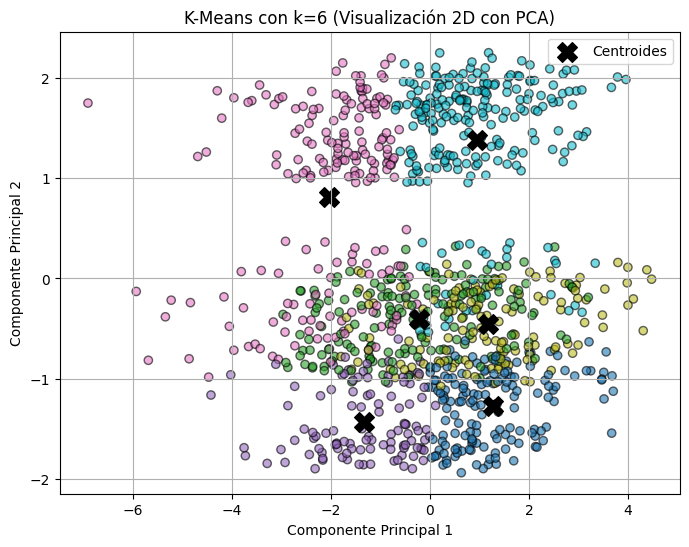

In [44]:
import matplotlib.pyplot as plt

# Graficar clusters con color por grupo
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels, cmap='tab10', alpha=0.6, edgecolor='k'
)

# Graficar los centroides
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='black', s=200, marker='X', label='Centroides'
)

plt.title('K-Means con k=6 (Visualización 2D con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()



In [45]:
# Características promedio por grupo
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)


,math score,reading score,writing score
cluster,,,
0,75.207792,78.831169,79.402597
1,65.595506,69.370787,67.837079
2,56.175926,57.481481,56.944444
3,50.331606,53.590674,50.803109
4,75.848485,74.954545,73.401515
5,72.502128,77.600000,77.051064


In [46]:
# Contar cuántos estudiantes hay por cluster
print(df['cluster'].value_counts().sort_index())


cluster
0    154
1    178
2    108
3    193
4    132
5    235
Name: count, dtype: int64


Esta tabla es muy similar a la anterior vista en el Primer K-Means, pero muestra algunos matices interesantes en los promedios.

---

1. Conclusión del clustering (K-Means con k = 6)

#### Cluster 0

* **Rendimiento muy alto** en todas las áreas: math (\~75), reading (\~79), writing (\~79).
* \~40 % completó el curso de preparación, \~78 % tiene almuerzo estándar.
* Nivel educativo parental alto (\~2.35).
* 100 % de este grupo pertenece a la **etnia D**.
* \~42 % son hombres.

**Perfil**: Estudiantes de alto rendimiento, con buen respaldo familiar y perfil socioeconómico medio-alto. Étnicamente homogéneo (grupo D).

---

#### 🔹 Cluster 1

* Puntajes académicos **moderados**: math (\~66), reading (\~69), writing (\~68).
* Preparación previa algo menor (\~37 %), almuerzo estándar en \~67 %.
* Nivel educativo parental medio (\~1.92).
* Todos del **grupo étnico B** y \~44 % hombres.

**Perfil**: Grupo homogéneo étnicamente, con desempeño medio, probablemente necesita apoyo adicional en lectura/escritura.

---

#### 🔹 Cluster 2

* Puntajes **bajos-moderados**: math (\~56), lectura y escritura \~57.
* Muy baja preparación previa (\~18 %), y solo \~43 % con almuerzo estándar.
* Bajo nivel educativo parental (\~1.78).
* Predominan los hombres (\~63 %) y todos del **grupo étnico D**.

**Perfil**: Vulnerabilidad educativa y social. Necesita intervención educativa y apoyo familiar.

---

#### 🔹 Cluster 3

* **El grupo con menor rendimiento**: math (\~50), reading (\~54), writing (\~51).
* Preparación previa y almuerzo estándar también bajos (\~19 % y \~40 %).
* Nivel parental más bajo (\~1.69).
* Étnicamente variado, dominado por el grupo **C (\~62 %)** y mayoría de hombres (\~60 %).

**Perfil**: Estudiantes en mayor riesgo académico y socioeconómico, con diversidad étnica. Requiere atención prioritaria.

---

#### 🔹 Cluster 4

* Rendimiento académico **alto**: math (\~76), lectura (\~75), escritura (\~73).
* Alta preparación previa (\~45 %) y buen acceso a almuerzo estándar (\~73 %).
* Nivel educativo parental también elevado (\~2.33).
* Todos del **grupo étnico E**, \~51 % hombres.

**Perfil**: Grupo excelente académicamente, con ventajas educativas y homogéneamente étnico (E). Potencial para liderazgo o mentoría.

---

#### 🔹 Cluster 5

* Muy buen rendimiento: math (\~72.5), reading (\~77.6), writing (\~77).
* La **mayor tasa de preparación previa** (\~48 %) y alto porcentaje con almuerzo estándar (\~79 %).
* Nivel parental elevado (\~2.34).
* Mayoría del grupo **étnico C (\~85 %)**, con menos hombres (\~37 %).

**Perfil**: Estudiantes bien preparados, con apoyo familiar y académico fuerte, y muy concentrados étnicamente.

---

Resumen

* **Clusters 0, 4 y 5**: Son los de **mejor rendimiento académico**, buen acceso a recursos, mayor preparación y respaldo familiar. Cada uno está dominado por una etnia distinta (D, E, C respectivamente).
* **Clusters 2 y 3**: Reflejan **desempeño más bajo**, bajo acceso a recursos, menor preparación académica y nivel educativo parental más bajo. Necesitan intervenciones específicas.
* **Cluster 1**: Grupo intermedio, homogéneo (grupo B), con características mixtas en rendimiento y recursos.

---

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Aplicar DBSCAN sobre los datos escalados
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajustable según distribución de datos
db_labels = dbscan.fit_predict(X_scaled)

# Añadir etiquetas DBSCAN al DataFrame
df['dbscan_cluster'] = db_labels


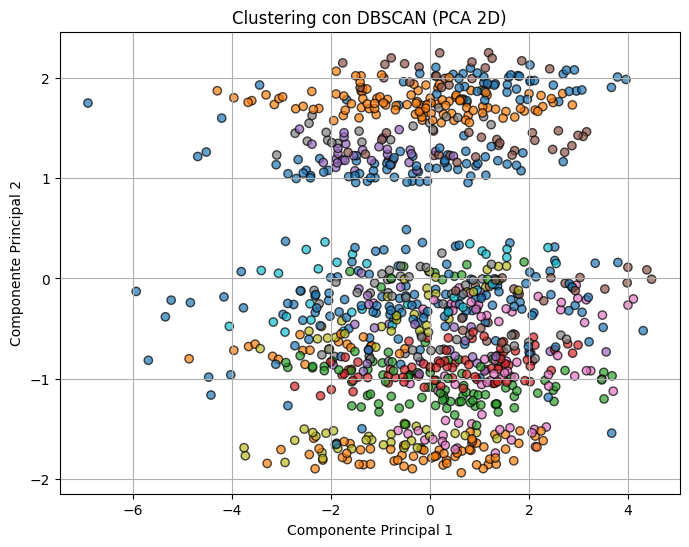

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', alpha=0.7, edgecolor='k')
plt.title('Clustering con DBSCAN (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [49]:
# Número de clusters (excluyendo ruido)
n_clusters_dbscan = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"Número de clusters encontrados por DBSCAN: {n_clusters_dbscan}")
print(f"Número de puntos considerados outliers (ruido): {n_noise}")


Número de clusters encontrados por DBSCAN: 37
Número de puntos considerados outliers (ruido): 103


In [50]:
if n_clusters_dbscan > 1:
    sil_db = silhouette_score(X_scaled, db_labels)
    print(f"Silhouette Score DBSCAN: {sil_db:.3f}")
else:
    print("DBSCAN no encontró suficientes clusters para calcular el Silhouette Score.")


Silhouette Score DBSCAN: 0.189


####La visualización de **DBSCAN** se ve distinta a la de **K-Means** porque **cada algoritmo agrupa datos con principios muy diferentes**.

 1. **Forma de los clusters**

* **K-Means** asume que los clusters son **esféricos o circulares**, y que todos tienen un tamaño similar.

  * Divide el espacio usando distancias al centroide (medias).
  * Siempre asigna **todos los puntos a algún cluster**.
* **DBSCAN**, en cambio, **no asume ninguna forma** para los clusters.

  * Detecta agrupaciones **basadas en densidad** (concentración de puntos).
  * Puede formar clusters de forma **irregular** (alargados, curvos, etc.).

---

 2. **DBSCAN detecta outliers**

* **DBSCAN** puede etiquetar algunos puntos como **ruido** (`label = -1`), si están muy lejos o aislados.

  * Esos puntos no se agrupan y aparecen dispersos o con un color distinto.
* **K-Means no puede detectar outliers**: siempre los incluye en algún grupo, incluso si no encajan bien.

---

 3. **Asignación flexible vs rígida**

* K-Means fuerza a que **cada punto pertenezca a algún cluster**.
* DBSCAN solo agrupa puntos **si están en zonas de alta densidad**. Los puntos aislados quedan sin grupo.

---

#### Conclusión

> La visualización de DBSCAN se ve distinta porque **detecta agrupaciones más naturales e irregulares** y **deja fuera los puntos ruidosos**, mientras que K-Means forma grupos más uniformes y forzados.


## Conclusiones tras analisis


¿Qué diferencias se observaron en el agrupamiento no supervisado?

> Las diferencias claves fueron las diferencias en los onjetivos de los analisis de supervisados y no supervisados, dado que en los supervisados lo9 principal y mas importante es poder ver si los alumnos aprueban o reprueban dependiendo de sus notas promedio, estado economico y otros datos como nivel de educacion parental. Sin embargo, en el analisis no supervisado se busco ver como los distintos estudiantes se agrupavan tomando en cuenta todos los datos que se tienen de ellos, con lo que se logro identificar una gran coorelacion entre su formacion parental, promedios de notas y su estado economico, siendo este ultimo uno de los mas importantes. misentras mas bajo su estado economico menor sera su desempeño escolar.

¿Existen coincidencias entre los estudiantes que reprueban y los clusters de bajo rendimiento?

> Si, se puede ver cierta relacion entre los estudiantes que repueban y el grupo al que se le asigno por Clusters. se explica mas en detalle las relaciones en los analisis de los modelos K-Means.

¿Cómo podrían usarse ambos enfoques para diseñar programas de apoyo, tutorías o segmentaciones personalizadas?

> Sí, creo que usar tanto enfoques supervisados como no supervisados puede ser súper útil para diseñar programas de apoyo más efectivos.
> Los modelos supervisados (como regresión logística, KNN o árboles de decisión) ayudan a predecir con más claridad quiénes podrían reprobar, considerando variables como las notas, el nivel socioeconómico, si hicieron o no el curso de preparación, o la educación de los padres. Es como tener una alerta temprana para saber a qué estudiantes hay que prestar más atención antes de que bajen su rendimiento.

> Los modelos no supervisados, como K-Means y DBSCAN, sirven para ver agrupaciones más naturales entre estudiantes, sin que se defina por "aprobar" o "reprobar". Fue bueno ya que sin la necesidad de esa etiqueta los algoritmos igual agrupaban a los estudiantes de bajo rendimiento junto a otros con características similares: bajos recursos, menor formación parental, etc. Incluso DBSCAN fue de ayuda para detectar casos atípicos o estudiantes "fuera de grupo", que tal vez necesitan una estrategia distinta, más personalizada.

> Entonces, llegamos a la conclusion de que combinar ambos enfoques permite hacer algo mucho más completo:

> Usar los supervisados para anticiparse al fracaso académico.

> Y usar los no supervisados para entender mejor los perfiles y diseñar tutorías o apoyos más segmentados, según las necesidades reales de cada grupo o estudiante.

> Así, no solo reaccionamos a los problemas cuando ya ocurrieron, sino que nos adelantamos y diseñamos soluciones más inteligentes y justas para todos.

In [51]:
# hacer un K-prototipes??

In [52]:
!pip install kmodes

In [53]:
from kmodes.kprototypes import KPrototypes

In [54]:
X

,math score,reading score,writing score,test preparation course,lunch,parental level of education,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,0,1,4,False,True,False,False,False
1,69,90,88,1,1,2,False,False,True,False,False
2,90,95,93,0,1,5,False,True,False,False,False
3,47,57,44,0,0,3,True,False,False,False,False
4,76,78,75,0,1,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,5,False,False,False,False,True
996,62,55,55,0,0,1,True,False,True,False,False
997,59,71,65,1,0,1,False,False,True,False,False
998,68,78,77,1,1,2,False,False,False,True,False


In [55]:
!pip install kprototypes

In [56]:
cat_columns = [3, 4, 5, 6, 7, 8, 9, 10]

In [57]:
kp = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=cat_columns)
# Print the resulting clusters
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 216, ncost: 160813.5108129412
Run: 1, iteration: 2/100, moves: 60, ncost: 159007.77357737656
Run: 1, iteration: 3/100, moves: 35, ncost: 158439.91901889545
Run: 1, iteration: 4/100, moves: 15, ncost: 158298.01920832065
Run: 1, iteration: 5/100, moves: 14, ncost: 158210.69805608277
Run: 1, iteration: 6/100, moves: 11, ncost: 158089.2670807599
Run: 1, iteration: 7/100, moves: 2, ncost: 158084.62907622944
Run: 1, iteration: 8/100, moves: 2, ncost: 158078.58208679085
Run: 1, iteration: 9/100, moves: 3, ncost: 158070.30168976224
Run: 1, iteration: 10/100, moves: 1, ncost: 158068.9366693634
Run: 1, iteration: 11/100, moves: 0, ncost: 158068.9366693634
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 319, ncost: 165093.99884686837
Run: 2, itera

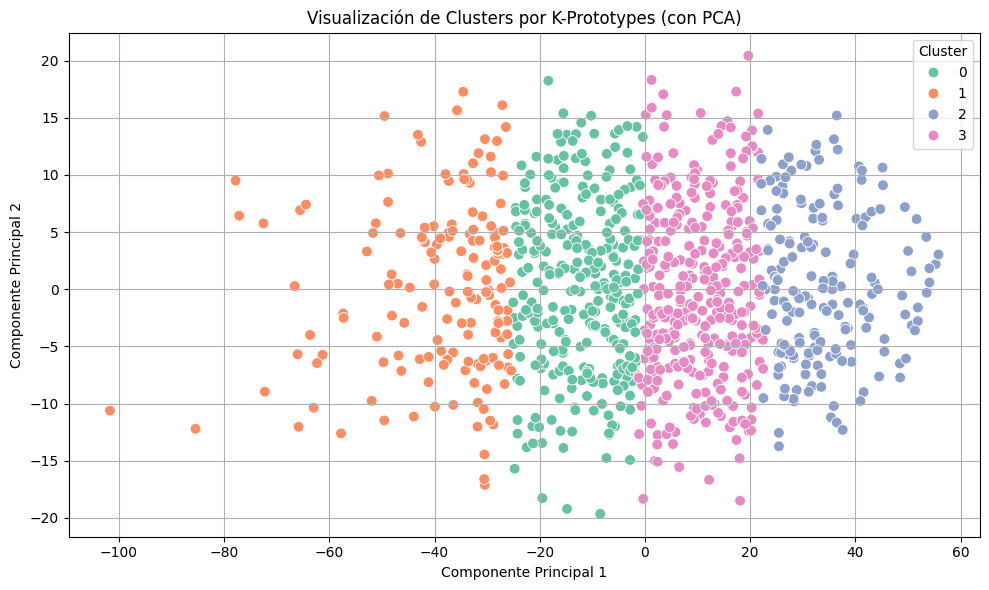

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Agrega los clusters al DataFrame
df['cluster'] = clusters

# Usa PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales y los clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualización de Clusters por K-Prototypes (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
from kmodes.kprototypes import KPrototypes

# Ajustar KPrototypes con k=3
kproto = KPrototypes(n_clusters=3, random_state=42, init='Huang', n_init=5)
clusters = kproto.fit_predict(X, categorical=cat_columns)


In [60]:
df['cluster'] = clusters


In [61]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


         math score  reading score  writing score
cluster                                          
0         65.365471      68.428251      67.760090
1         81.739414      85.159609      84.250814
2         47.943320      50.631579      48.453441


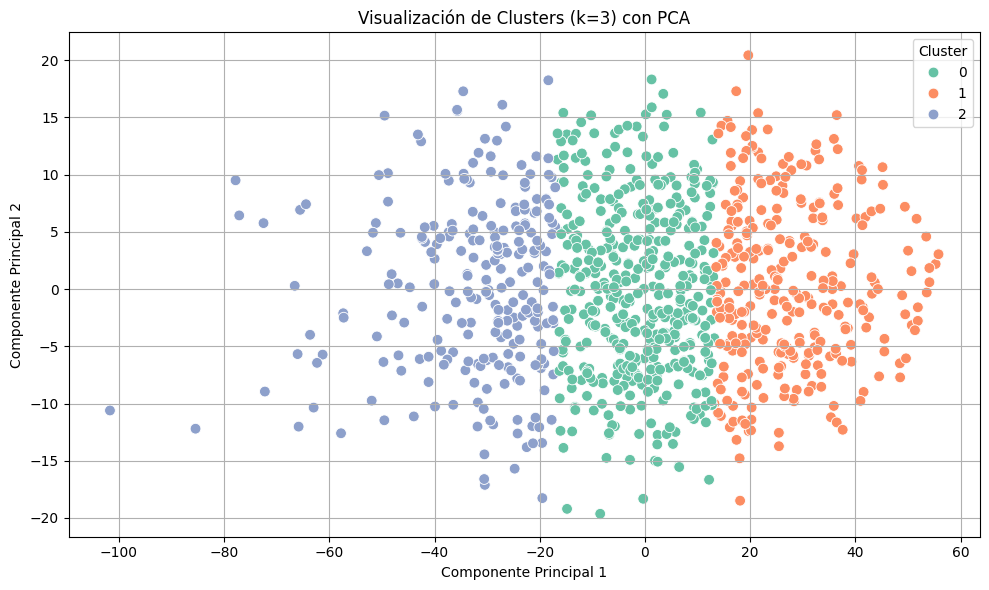

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir dimensiones para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DataFrame para visualizar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualización de Clusters (k=3) con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


---

In [63]:
edu_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
edu_reverse = {v: k for k, v in edu_order.items()}


In [64]:
def interpret_education_level(avg_value):
    closest = round(avg_value)
    return edu_reverse.get(closest, "Unknown")


In [65]:
cluster_summary = df.groupby('cluster').mean()


In [66]:
# Aplicar a cada cluster el nivel de educación parental
education_levels = cluster_summary['parental level of education'].apply(interpret_education_level)

# Mostrar resultados
for i, level in education_levels.items():
    print(f"Cluster {i}: Nivel educativo típico de los padres -> {level}")


Cluster 0: Nivel educativo típico de los padres -> some college
Cluster 1: Nivel educativo típico de los padres -> some college
Cluster 2: Nivel educativo típico de los padres -> some college


In [67]:
# Agrupar por cluster y calcular el promedio
cluster_summary = df.groupby('cluster')[features].mean()

# Crear un diccionario con un DataFrame por cluster
cluster_dfs = {f"cluster_{i}": df[df['cluster'] == i] for i in df['cluster'].unique()}

# Opcional: mostrar los DataFrames
for name, cluster_df in cluster_dfs.items():
    print(f"\n{name} (n = {len(cluster_df)}):")
    display(cluster_df.head())  # O usa print(cluster_df.head()) si no estás en Jupyter



cluster_0 (n = 446):


,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,approved,final_grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,cluster,dbscan_cluster
0,4,1,0,72,72,74,72.666667,True,72.666667,False,True,False,False,False,0,0
8,1,0,1,64,64,67,65.000000,True,65.000000,True,False,False,True,False,0,32
12,1,1,0,65,81,73,73.000000,True,73.000000,False,True,False,False,False,0,0
13,2,1,1,78,72,70,73.333333,True,73.333333,True,False,False,False,False,0,-1
15,0,1,0,69,75,78,74.000000,True,74.000000,False,False,True,False,False,0,5



cluster_1 (n = 307):


,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,approved,final_grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,cluster,dbscan_cluster
1,2,1,1,69,90,88,82.333333,True,82.333333,False,False,True,False,False,1,1
2,5,1,0,90,95,93,92.666667,True,92.666667,False,True,False,False,False,1,0
4,2,1,0,76,78,75,76.333333,True,76.333333,True,False,True,False,False,1,2
5,3,1,0,71,83,78,77.333333,True,77.333333,False,True,False,False,False,1,0
6,2,1,1,88,95,92,91.666667,True,91.666667,False,True,False,False,False,1,31



cluster_2 (n = 247):


,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,approved,final_grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,cluster,dbscan_cluster
3,3,0,0,47,57,44,49.333333,True,49.333333,True,False,False,False,False,2,34
7,2,0,0,40,43,39,40.666667,True,40.666667,True,True,False,False,False,2,3
9,1,0,0,38,60,50,49.333333,True,49.333333,False,True,False,False,False,2,28
10,3,1,0,58,54,52,54.666667,True,54.666667,True,False,True,False,False,2,2
11,3,1,0,40,52,43,45.000000,True,45.000000,True,False,False,True,False,2,4


In [68]:
cluster_0_df = cluster_dfs["cluster_0"]
cluster_1_df = cluster_dfs["cluster_1"]
cluster_2_df = cluster_dfs["cluster_2"]

In [69]:
edu_order = {
    0: "some high school",
    1: "high school",
    2: "some college",
    3: "associate's degree",
    4: "bachelor's degree",
    5: "master's degree"
}

cluster_2_df['parental level of education'].map(edu_order).value_counts()


,count
parental level of education,
high school,69
some high school,56
associate's degree,53
some college,42
bachelor's degree,19
master's degree,8


In [70]:
print("Distribución de tipo de almuerzo:")
print(cluster_2_df['lunch'].map({1: 'standard', 0: 'free/reduced'}).value_counts())

print("\nPreparación para el test:")
print(cluster_2_df['test preparation course'].map({1: 'completed', 0: 'none'}).value_counts())


Distribución de tipo de almuerzo:
lunch
free/reduced    139
standard        108
Name: count, dtype: int64

Preparación para el test:
test preparation course
none         196
completed     51
Name: count, dtype: int64


In [71]:
print("Distribución de género:")
cluster_2_df['gender_male'].map({1: 'male', 0: 'female'}).value_counts()


Distribución de género:


,count
gender_male,


In [72]:
edu_order = {
    0: "some high school",
    1: "high school",
    2: "some college",
    3: "associate's degree",
    4: "bachelor's degree",
    5: "master's degree"
}

cluster_1_df['parental level of education'].map(edu_order).value_counts()


,count
parental level of education,
associate's degree,80
some college,72
some high school,50
bachelor's degree,43
high school,34
master's degree,28


In [73]:
print("Distribución de tipo de almuerzo:")
print(cluster_1_df['lunch'].map({1: 'standard', 0: 'free/reduced'}).value_counts())

print("\nPreparación para el test:")
print(cluster_1_df['test preparation course'].map({1: 'completed', 0: 'none'}).value_counts())


Distribución de tipo de almuerzo:
lunch
standard        236
free/reduced     71
Name: count, dtype: int64

Preparación para el test:
test preparation course
none         154
completed    153
Name: count, dtype: int64
